<a href="https://colab.research.google.com/github/GabeMaldonado/JupyterNotebooks/blob/master/RNN_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
# load data
df = pd.read_csv('Alcohol_Sales.csv', index_col='DATE', parse_dates=True)

In [3]:
df.head()

,S4248SM144NCEN
DATE,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221


In [4]:
df.describe()

,S4248SM144NCEN
count,325.000000
mean,7886.400000
std,2914.269061
min,3031.000000
25%,5231.000000
50%,7481.000000
75%,9977.000000
max,15504.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 325 entries, 1992-01-01 to 2019-01-01
Data columns (total 1 columns):
S4248SM144NCEN    325 non-null int64
dtypes: int64(1)
memory usage: 5.1 KB


In [0]:
# change frequency 
df.index.freq = 'MS'

In [0]:
# rename column name
df.columns = ['Sales']

In [8]:
df.head()

,Sales
DATE,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221


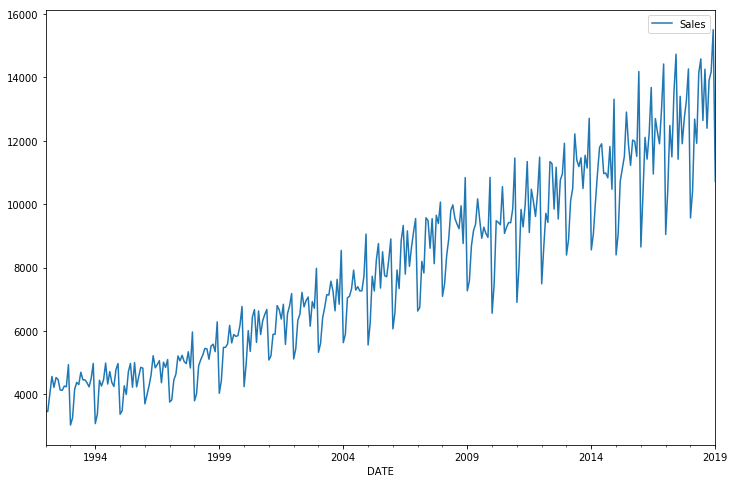

In [9]:
df.plot(figsize=(12,8))

In [0]:
# run ETS decompositions
 from statsmodels.tsa.seasonal import seasonal_decompose

In [0]:
# Format plot to enhance ETS graph

from pylab import rcParams

rcParams['figure.figsize'] = 12,8


In [0]:
result = seasonal_decompose(df['Sales'])

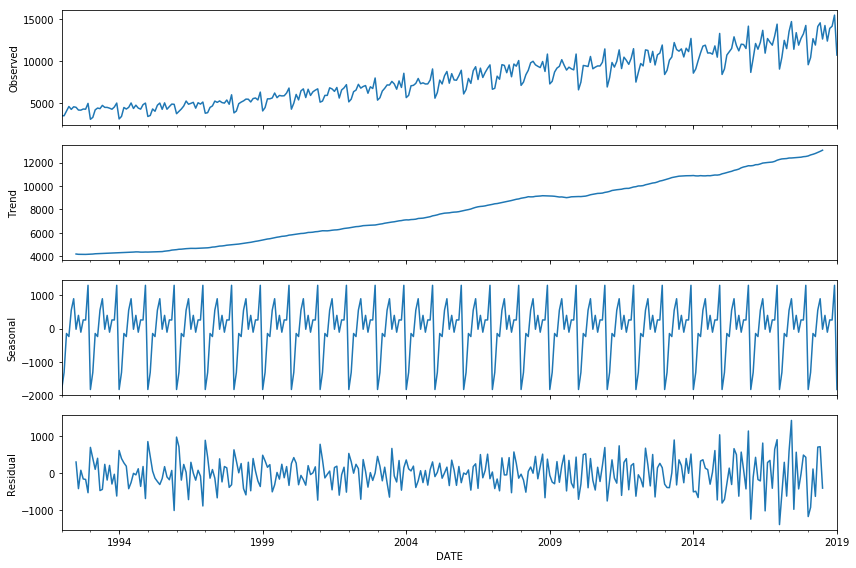

In [13]:
result.plot();

In [0]:
# Perform a train-test split
# we are forecasting for a year. len of df is 325 - 12
train = df.iloc[:313]
test = df.iloc[313:]

In [15]:
# check test data
test

,Sales
DATE,
2018-02-01,10415
2018-03-01,12683
2018-04-01,11919
2018-05-01,14138
2018-06-01,14583
2018-07-01,12640
2018-08-01,14257
2018-09-01,12396
2018-10-01,13914


## Normalize Data
When running a neural network we need to scale/normalize the data.
A simple approach for nomalizing data is to divide it by its maximun value. 

In [0]:
# Normalize data using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler 


In [0]:
# create scaler object 

scaler = MinMaxScaler()

In [18]:
# fit scaler to train data

scaler.fit(train)  # finds max value in training data

MinMaxScaler(copy=True, feature_range=(0, 1))

In [0]:
# transform training and testing data

scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

### Create a Generator

In [20]:
# for defining a generator
from keras.preprocessing.sequence import TimeseriesGenerator

Using TensorFlow backend.


In [0]:
# create generator

n_input = 2
n_feautures = 1

generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [0]:
# check first item on generator
# tupple unpacking 
X, y = generator[0]


In [23]:
X

array([[[0.03658432],
        [0.03649885]]])

In [24]:
y

array([[0.08299855]])

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [0]:
# create generator

n_input = 12  # 12 months of data
n_feautures = 1

train_generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

### Create Model

In [27]:
# Create model and fit to the generator object

model = Sequential()

# add LSTM layer with 150 neurons

model.add(LSTM(150, activation='relu', input_shape=(n_input, n_feautures)))

# aggregate all those neurons to a single prediction

model.add(Dense(1))

# compile

model.compile(optimizer='adam', loss='mse')



W0728 01:59:06.933073 140456433141632 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0728 01:59:06.985158 140456433141632 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0728 01:59:06.992524 140456433141632 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0728 01:59:07.286607 140456433141632 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [28]:
# get model's summary

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 150)               91200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 151       
Total params: 91,351
Trainable params: 91,351
Non-trainable params: 0
_________________________________________________________________


In [29]:
# fit model to trainer_generator

model.fit_generator(train_generator, epochs=25)



W0728 01:59:07.566876 140456433141632 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0728 01:59:08.189300 140456433141632 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0728 01:59:08.277975 140456433141632 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



Epoch 1/25
301/301 [==============================] - 5s 16ms/step - loss: 0.0237
Epoch 2/25
301/301 [==============================] - 4s 12ms/step - loss: 0.0091
Epoch 3/25
301/301 [==============================] - 3s 11ms/step - loss: 0.0103
Epoch 4/25
301/301 [==============================] - 3s 11ms/step - loss: 0.0083
Epoch 5/25
301/301 [==============================] - 3s 12ms/step - loss: 0.0068
Epoch 6/25
301/301 [==============================] - 3s 11ms/step - loss: 0.0065
Epoch 7/25
301/301 [==============================] - 3s 11ms/step - loss: 0.0049
Epoch 8/25
301/301 [==============================] - 3s 11ms/step - loss: 0.0034
Epoch 9/25
301/301 [==============================] - 3s 11ms/step - loss: 0.0029
Epoch 10/25
301/301 [==============================] - 3s 11ms/step - loss: 0.0030
Epoch 11/25
301/301 [==============================] - 3s 12ms/step - loss: 0.0024
Epoch 12/25
301/301 [==============================] - 3s 11ms/step - loss: 0.0026
Epoch 13/25
3

In [30]:
# Plot loss

model.history.history.keys()

dict_keys(['loss'])

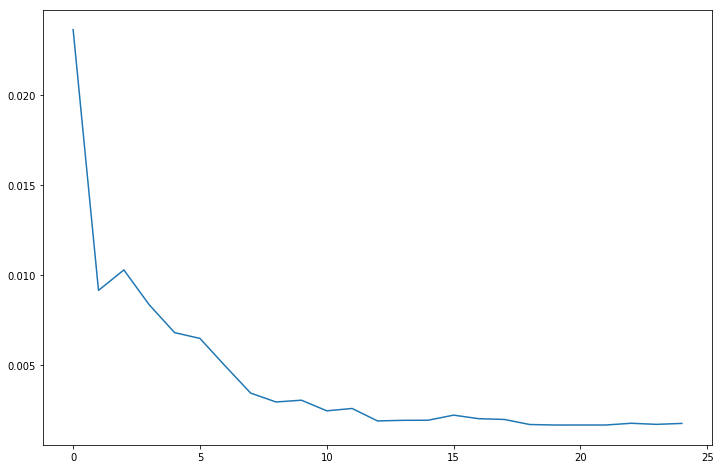

In [31]:
plt.plot(range(len(model.history.history['loss'])), model.history.history['loss']);

### Evaluate Model on Test Data

Network trains one step ahead so for 12 history steps/data points  it would predict step 13. In this case we need the last 12 points of the train data to get the first point of the test data.

In [32]:
first_eval_batch = scaled_train[-12:]
first_eval_batch

array([[0.63432772],
       [0.80776135],
       [0.72313873],
       [0.89870929],
       [1.        ],
       [0.71672793],
       [0.88648602],
       [0.75869732],
       [0.82742115],
       [0.87443371],
       [0.96025301],
       [0.5584238 ]])

The shape of the object returned by the generator is 3-dimesional so we need to reshape the ```first_eval_batch```  because it does not have the shape that the network expects.

In [0]:
first_eval_batch = first_eval_batch.reshape((1, n_input, n_feautures))

In [34]:
model.predict(first_eval_batch)

array([[0.6847901]], dtype=float32)

# Forecast Using RNN Model

In [0]:
# Create empty list to hold predictions

test_predictions = []

# Get last n_input points from the training set

first_eval_batch = scaled_train[-n_input:]

# Reshape to shape required by RNN, as above (same format as TimeSeriesGenerator)

current_batch = first_eval_batch.reshape(1, n_input, n_feautures)

# How far into the future we want to forecast?
# len(test) --> 24

for i in range(len(test)):
  # one value ahead of historical 12 points
  current_pred = model.predict(current_batch)[0]
  
  # store prediction
  test_predictions.append(current_pred)
  
  # update current batch
  current_batch = np.append(current_batch[:,1:,:],[[current_pred]], axis=1)







In [36]:
# Check predictions
test_predictions

[array([0.6847901], dtype=float32),
 array([0.80199957], dtype=float32),
 array([0.7655882], dtype=float32),
 array([0.9260147], dtype=float32),
 array([0.9795607], dtype=float32),
 array([0.7593316], dtype=float32),
 array([0.8821194], dtype=float32),
 array([0.7802382], dtype=float32),
 array([0.8487941], dtype=float32),
 array([0.89755493], dtype=float32),
 array([0.94207823], dtype=float32),
 array([0.606479], dtype=float32)]

As we can see, the predictions remain scaled so we need to undo the scaling to get the true values.


In [0]:
true_predictions = scaler.inverse_transform(test_predictions)

In [38]:
# Check predictions
true_predictions

array([[11042.35908538],
       [12413.59295702],
       [11987.61663181],
       [13864.44622558],
       [14490.8803162 ],
       [11914.42020094],
       [13350.91506171],
       [12159.0068323 ],
       [12961.04220712],
       [13531.49517316],
       [14052.37324512],
       [10126.19769377]])

### Visualizing the Predictions

Plot Sales against Predictions


In [39]:
# First add true predictions to the test df.
test['Predictions'] = true_predictions

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [40]:
test

,Sales,Predictions
DATE,,
2018-02-01,10415,11042.359085
2018-03-01,12683,12413.592957
2018-04-01,11919,11987.616632
2018-05-01,14138,13864.446226
2018-06-01,14583,14490.880316
2018-07-01,12640,11914.420201
2018-08-01,14257,13350.915062
2018-09-01,12396,12159.006832
2018-10-01,13914,12961.042207


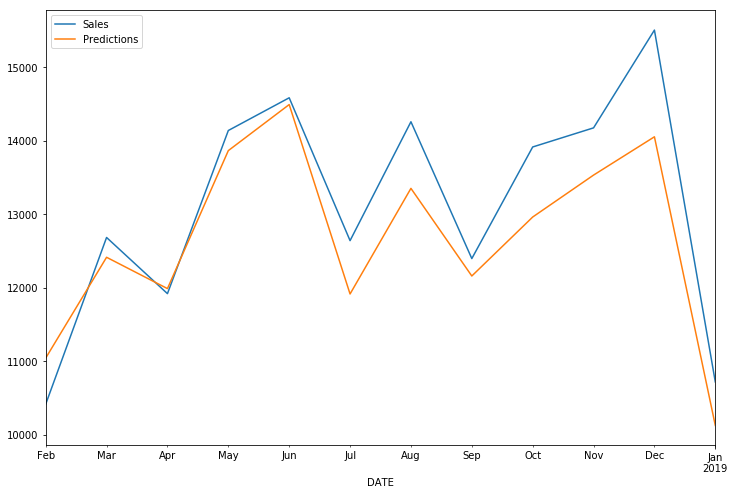

In [41]:
test.plot(figsize=(12,8))

## Saving Model

---



In [0]:
model.save('RNN_Alcohonl_Sales_Model.h5')

In [43]:
pwd

'/content'

We can import our save model by:


In [0]:
from keras.models import load_model

In [0]:
new_model = load_model('RNN_Alcohonl_Sales_Model.h5')

In [46]:
new_model.summary()ß

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 150)               91200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 151       
Total params: 91,351
Trainable params: 91,351
Non-trainable params: 0
_________________________________________________________________
